In [2]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
path = "/Users/andrejsilaev/Downloads/MMO-main/lr1"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(path+'/Video_Games_Sales.csv')

In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
data.isnull().all()

Name               False
Platform           False
Year_of_Release    False
Genre              False
Publisher          False
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score       False
Critic_Count       False
User_Score         False
User_Count         False
Developer          False
Rating             False
dtype: bool

In [7]:
data["EU_Sales"].value_counts()

0.00    5874
0.01    1494
0.02    1308
0.03     926
0.04     709
        ... 
9.14       1
1.92       1
3.86       1
2.59       1
3.87       1
Name: EU_Sales, Length: 307, dtype: int64

<AxesSubplot:>

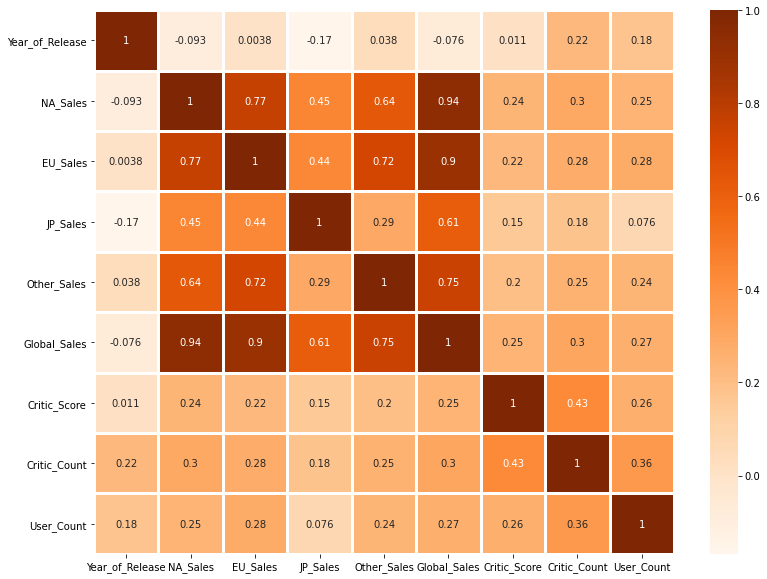

In [8]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), cmap="Oranges", annot=True, linewidths=3)

Из матрицы корреляции видно, что наиболее сильно коррелируют показатели продаж Северной Америки и Европы

<AxesSubplot:xlabel='Platform', ylabel='count'>

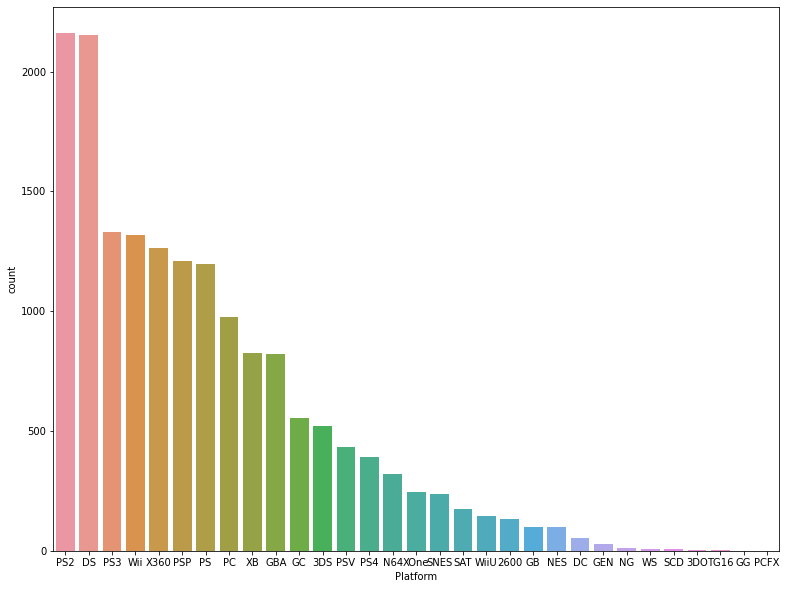

In [9]:
plt.figure(figsize=(13,10))
sns.countplot(x="Platform", data=data, order=data["Platform"].value_counts().index)

Из графика видно, что количество игр на платфоме "PS2" наибольшее, дальше идёт жанр "DS", а меньше всего игр на платформе "GG".

In [10]:
sales_data_year = data.groupby(by="Year_of_Release").sum()
sales_data_year.drop(columns=["Global_Sales", "Critic_Score", "Critic_Count", "User_Count"], inplace=True)
sales_data_year

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year_of_Release,,,,
1980.0,10.59,0.67,0.00,0.12
1981.0,33.40,1.96,0.00,0.32
1982.0,26.92,1.65,0.00,0.31
1983.0,7.76,0.80,8.10,0.14
1984.0,33.28,2.10,14.27,0.70
1985.0,33.73,4.74,14.56,0.92
1986.0,12.50,2.84,19.81,1.93
1987.0,8.46,1.41,11.63,0.20
1988.0,23.87,6.59,15.76,0.99


Text(0, 0.5, 'Sales')

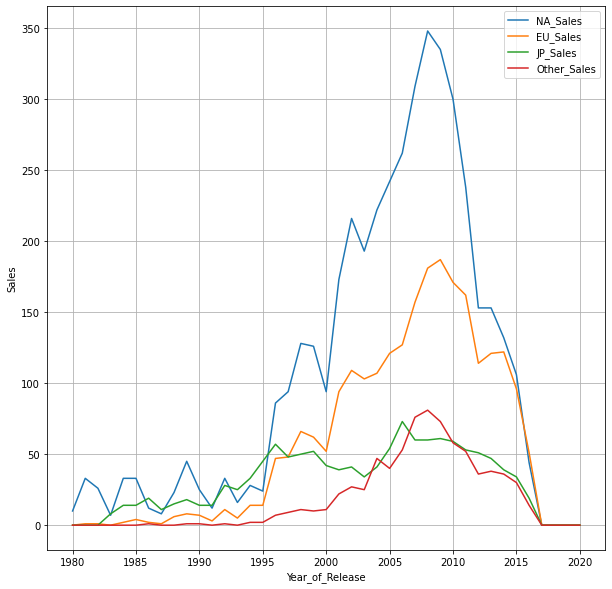

In [11]:
sales_data_year = sales_data_year.apply(lambda x: x.astype("int"))
sales_data_year.plot.line(figsize=(10,10), grid="on");
plt.ylabel("Sales")

После разбиения продажи игр по года получается, что в 2011 году больше всех заработала Северная Америка. Затем Европа. Далее идут другие страны. Япония получила наименьший доход.

In [12]:
sales_region = data[["NA_Sales", "EU_Sales", "JP_Sales"]]
sales_region = sales_region.sum().reset_index()
sales_region = sales_region.rename(columns={"index": "region", 0: "sale"})
sales_region

,region,sale
0,NA_Sales,4402.62
1,EU_Sales,2424.67
2,JP_Sales,1297.43


In [13]:
values = sales_region["region"]
sizes = sales_region["sale"]

([<matplotlib.patches.Wedge at 0x7feae64efdc0>,
 [Text(-1.0904930590581252, -0.14430830934514013, 'NA_Sales'),
  Text(1.0255163791147273, -0.39788962812244694, 'EU_Sales'),
  Text(0.5289876929807663, 0.964454260540585, 'JP_Sales')],
 [Text(-0.5948143958498864, -0.07871362327916734, '54.2%'),
  Text(0.5593725704262148, -0.2170307062486074, '29.8%'),
  Text(0.2885387416258725, 0.5260659602948645, '16.0%')])

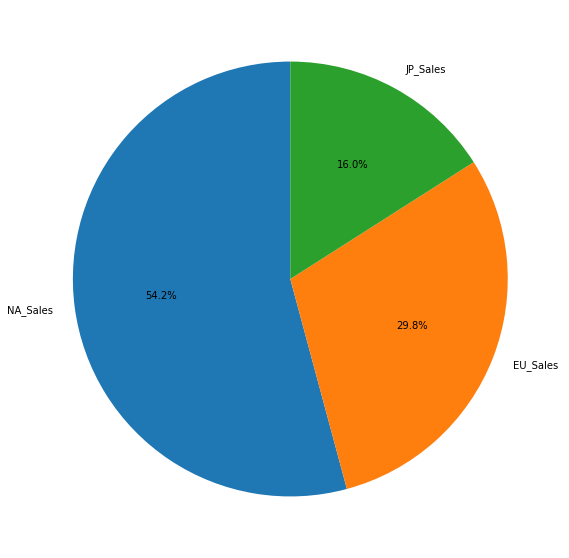

In [14]:
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=values, autopct="%1.1f%%", startangle=90)

Северная Америка имеет большую долю в продаже игр. На втором месте Европа, а на последнем Япония.